# Assignment 4 – Multilayer Perceptron.

## Hardik Galiawala (B00777450)

1. **[20 marks, 15 marks for Grads]** Implement a multi-layer perceptron (MLP) by modifying the MLP program from the class to solve the XOR problem and train it to translate the digital letters given in file pattern1 into the corresponding ASCII representation. In the file, each letter of the alphabet is represented by a matrix of 12x13 binary values so that each consecutive 12 rows represent one letter. Plot a training curve and interpret your results.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli as bn

Implementation of Multi Layer Perceptron (MLP) as done in class for XOR problem to solve the problem given in "pattern1.txt".

In [3]:
def neural_net_fit(X_train, Y_train, hidden_nodes = 26, no_of_iterations = 1000, learning_rate = 0.1, no_of_op_nodes = 7):   
    
    Ni = X_train.shape[0]; Nh1 = hidden_nodes; No = no_of_op_nodes
    wh1 = np.random.randn(Nh1, Ni); dwh1 = np.zeros(wh1.shape)
    wo = np.random.randn(No, Nh1); dwo = np.zeros(wo.shape)
    error = np.array([])
    Ntrials = no_of_iterations
    
    for trial in range(Ntrials):
        h1 = 1 / (1 + np.exp(-wh1 @ X_train)) # Hidden Layer 1
        y = 1 / (1 + np.exp(-wo@h1)) # Output for all patterns
        y= y.T
        
        do = y * (1 - y) * (Y_train - y) # Delta output
        dh1 = h1 * (1 - h1) * (wo.transpose() @ do.T) # Delta backpropagated to h1    
        
        # update weights with momentum
        # Output layer
        dwo = 0.9 * dwo + do.T @ h1.T
        wo = wo + learning_rate * dwo
        # Hidden layer
        dwh1 = 0.9 * dwh1 + dh1 @ X_train.T
        wh1 = wh1 + learning_rate * dwh1
        
        # Calculating delta term 
        error = np.append(error, np.sum(abs(Y_train - y)))
        
    return(error, y, wo, wh1)

In [4]:
def neural_net_predict(X_train, wo, wh1, Y_train):
    
    h1 = 1 / (1 + np.exp(-wh1 @ X_train)) # Hidden Layer 1
    y = 1 / (1 + np.exp(-wo @ h1)) # Output for all patterns
    y = y.T
    count = 0
    for i in range(len(y)):
        binary_string_predicted = ""
        binary_string_train = ""
        Y_train_round = np.around(Y_train[i, :]).astype(int).ravel()
        Y_pred_round = np.around(y[i, :]).astype(int).ravel()
        for j in Y_pred_round:
            binary_string_predicted += str(j)
        for k in Y_train_round:
            binary_string_train += str(k)
        if (binary_string_train == binary_string_predicted):
            count += 1
        print(chr(int(binary_string_train, base=2)), chr(int(binary_string_predicted, base=2)))
    
    print("Training Accuracy: ", count/Y_train.shape[0] * 100)
    

After tuning hidden_nodes parameter, we come to a conclusion that 20 number of hidden nodes gives us the best result for training on noiseless data.

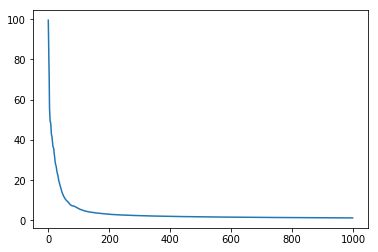

A A
B B
C C
D D
E E
F F
G G
H H
I I
J J
K K
L L
M M
N N
O O
P P
Q Q
R R
S S
T T
U U
V V
W W
X X
Y Y
Z Z
Training Accuracy:  100.0


In [55]:
def question_1():
    X = np.array(np.loadtxt('pattern1.txt'))#.astype(int)
    Y_train = np.array([])
    X_train = X.reshape(156,26)
    for ascii_value in range(65,91):
        binary_value = str("{0:b}".format(ascii_value))
        for alpha_bin in binary_value:
            Y_train = np.append(Y_train, int(alpha_bin))
    Y_train = Y_train.reshape(26, 7)
    error, y, wo, wh1 = neural_net_fit(X_train, Y_train)
    plt.plot(error)
    plt.show()
    neural_net_predict(X_train, wo, wh1, Y_train)
    
question_1()

From the above graph we can see that we trained our model with 1000 iterations, hidden nodes as 20 and learning rate as 0.1. We observe that after a few hundred iterations the error is gradually reduced to zero. This gives us training accuracy as 100 percent(or 1.0)

2 **[20 marks, 10 marks for Grads]** Investigate how much noise the MLP can tolerate in the pattern before being unable to recognize a letter. Explain your implementation of noise and report your results.

In [9]:
def add_noise_bernoulli(X_train, percent_noise):
    
    
    p_noise = (100 - percent_noise) / 100
    np.random.seed(10)
    flag = bn.rvs(p = p_noise, size = X_train.shape)
    #random_numbers = np.random.randn(X_train.shape[0], X_train.shape[1])
    random_numbers = np.random.randint(0, 9, size = X_train.shape)
    X_train[flag == 0] = random_numbers[flag == 0]
    return(X_train)

Above function returns an array X_train after adding noise to it. We are using Bernoulli's noise addition method rvs()to create a same array of size X_train. rvs() has a parameter "p" which handles the amount of noise added. This parameter should be in range 0 to 1. This newly created array "flag" has randomly assigned 0 and 1 values based on the parameter "p". Then we insert random integers between 0 to 5 at the index of original array "X_train" instead of 0s in the flag array.

In [ ]:
def predict_char(y, Y_train):
    count = 0
    for i in range(len(y)):
        binary_string_predicted = ""
        binary_string_train = ""
        Y_train_round = np.around(Y_train[i, :]).astype(int).ravel()
        Y_pred_round = np.around(y[i, :]).astype(int).ravel()
        for j in Y_pred_round:
            binary_string_predicted += str(j)
        for k in Y_train_round:
            binary_string_train += str(k)
        if (binary_string_train == binary_string_predicted):
            count += 1
        else:
            count += 0
        print(chr(int(binary_string_predicted, base=2)))
    
    print("Training Accuracy: ", count/0.26)
    

predict_char(y) function prints characters after converting them from binary values. We have created this function to compare alphabets from Y_train.

We add 20% noise and then train our model and observe the results.

Alphabet set from the trained model: 
A A
B B
C C
D D
E E
F F
G G
H H
I I
J J
K K
L L
M M
N O
O O
P P
Q Q
R R
S S
T T
U U
V V
W W
X X
Y Y
Z Z
Training Accuracy:  96.15384615384616


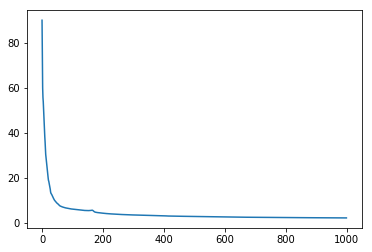

In [34]:
def question_2_noise_20():
    X_train_noise = add_noise_bernoulli(X_train, 20)
    error, y, wo, wh1 = neural_net_fit(X_train, Y_train)
    print("Alphabet set from the trained model: ")
    neural_net_predict(X_train_noise, wo, wh1, Y_train)     
    plt.plot(error)
    plt.show()
    
question_2_noise_20()

From the above result, we understand that the network starts predicting wrong alphabets at 20% of noise.

Furthermore, we add 25% noise and then train our model and observe the results.

Alphabet set from the trained model: 
A A
B B
C C
D D
E E
F F
G G
H H
I I
J J
K K
L M
M M
N N
O O
P P
Q Q
R R
S S
T T
U U
V V
W W
X X
Y Y
Z [
Training Accuracy:  92.3076923076923


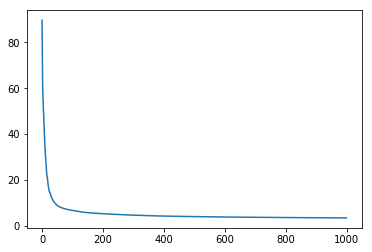

In [49]:
def question_2_noise_25():
    X_train_noise = add_noise_bernoulli(X_train, 25)
    error, y, wo, wh1 = neural_net_fit(X_train, Y_train)
    print("Alphabet set from the trained model: ")
    neural_net_predict(X_train_noise, wo, wh1, Y_train)     
    plt.plot(error)
    plt.show()
    
question_2_noise_25()

We add 35% noise and then train our model and observe the results.

Alphabet set from the trained model: 
A H
B B
C K
D D
E E
F F
G E
H H
I I
J H
K K
L H
M M
N N
O K
P Q
Q Q
R S
S S
T T
U ]
V V
W W
X H
Y Y
Z Z
Training Accuracy:  61.53846153846154


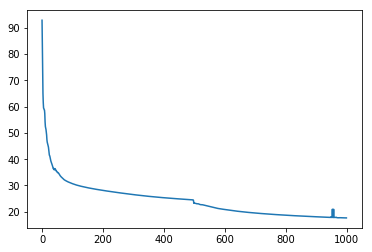

In [36]:
def question_2_noise_35():
    X_train_noise = add_noise_bernoulli(X_train, 35)
    error, y, wo, wh1 = neural_net_fit(X_train, Y_train)
    print("Alphabet set from the trained model: ")
    neural_net_predict(X_train_noise, wo, wh1, Y_train)     
    plt.plot(error)
    plt.show()
    
question_2_noise_35()

We have visualized above observations in the graph below.

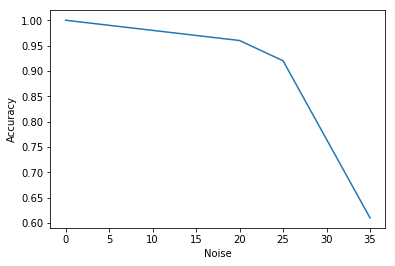

In [57]:
plt.plot([0, 20, 25, 35],[1.0, 0.96, 0.92, 0.61])
plt.xlabel('Noise')
plt.ylabel('Accuracy')
plt.show()

Thus, we can see that if we keep on increasing the noise, the training accuracy keeps on decreasing. Thus noise is inversely proportional to the training accuracy. Also, the addition of noise makes it difficult for network to predict correct alphabets as we can see from the above printed list.

3.**[10 marks, 5 marks for Grads]** Which letter is represented in file pattern2?

While predicting the alphabet from the pattern2.txt file, it was observed that the network is predicting different alphabet everytime. So we try to fit the model and predict the alphabet 100 times and then take out the alphabet which has maximum frequency of prediction. Also, it is worth noting that we have used 100 hidden nodes as it is helpful in predicting noisy data (conclusion of 4th question). 

In [37]:
def nn_predict(y, wo, wh1):
    y = y.reshape(1, 156)
    pred_value = 1 / (1 + np.exp(-y @ wh1.T)) # Hidden Layer 1
    pred_value_2 = 1 / (1 + np.exp(-pred_value @ wo.T))
    
    return(pred_value_2)

In [38]:
Y_pred = np.array(np.loadtxt('pattern2.txt'))

In [52]:
char_list = []
for i in range(100):

    error, y, wo, wh1 = neural_net_fit(X_train, Y_train, hidden_nodes = 100)
    y_predicted = nn_predict(Y_pred, wo, wh1)    
    Y_pred_round = np.around(y_predicted).astype(int).ravel()
    binary_string = ""
    for j in Y_pred_round:
        binary_string += str(j)
    char_list.append(chr(int(binary_string, base=2)))
    

print("The letter in the file pattern2.txt is: ")
print(max(set(char_list), key=char_list.count))

    

The letter in the file pattern2.txt is: 
H


4.**Grad Students only [20 marks]** Investigate the network performance when training on noisy patterns. Also, how does the number of hidden nodes influence the performance?

We have added some noise to X_train which is then used to fit the neural network with variable hidden nodes. 

For 20 hidden nodes: -

Alphabet set from the trained model: 
A A
B B
C C
D D
E M
F F
G G
H H
I I
J B
K K
L L
M M
N N
O O
P P
Q Q
R R
S S
T T
U U
V V
W W
X X
Y Y
Z X
Training Accuracy:  88.46153846153845


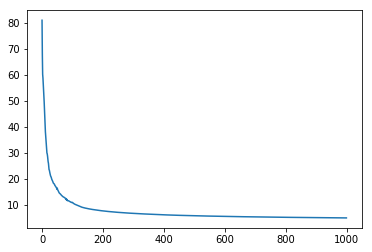

In [43]:
X = np.array(np.loadtxt('pattern1.txt'))#.astype(int)
X_train = X.reshape(156,26)

Y_train = np.array([])
for ascii_value in range(65,91):
    binary_value = str("{0:b}".format(ascii_value))
    for alpha_bin in binary_value:
        Y_train = np.append(Y_train, int(alpha_bin))
Y_train = Y_train.reshape(26, 7)
X_train_2 = add_noise_bernoulli(X_train, 35)
error, y, wo, wh1 = neural_net_fit(X_train, Y_train, hidden_nodes = 20)
print("Alphabet set from the trained model: ")
neural_net_predict(X_train_2, wo, wh1, Y_train)
plt.plot(error)
plt.show()

For 100 hidden nodes: -

Alphabet set from the trained model: 
A A
B B
C C
D D
E E
F F
G G
H H
I I
J J
K K
L L
M M
N N
O O
P P
Q Q
R R
S S
T T
U W
V V
W W
X X
Y Y
Z Z
Training Accuracy:  96.15384615384616


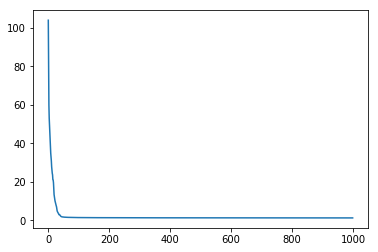

In [19]:
X = np.array(np.loadtxt('pattern1.txt'))#.astype(int)
X_train = X.reshape(156,26)

Y_train = np.array([])
for ascii_value in range(65,91):
    binary_value = str("{0:b}".format(ascii_value))
    for alpha_bin in binary_value:
        Y_train = np.append(Y_train, int(alpha_bin))
Y_train = Y_train.reshape(26, 7)
X_train_2 = add_noise_bernoulli(X_train, 35)
error, y, wo, wh1 = neural_net_fit(X_train_2, Y_train, hidden_nodes = 100)
print("Alphabet set from the trained model: ")
neural_net_predict(X_train_2, wo, wh1, Y_train)
plt.plot(error)
plt.show()

For 200 hidden nodes: -

Alphabet set from the trained model: 
A A
B B
C C
D D
E E
F F
G G
H H
I Y
J J
K K
L L
M M
N N
O O
P P
Q Q
R S
S S
T T
U U
V V
W W
X X
Y Y
Z R
Training Accuracy:  88.46153846153845


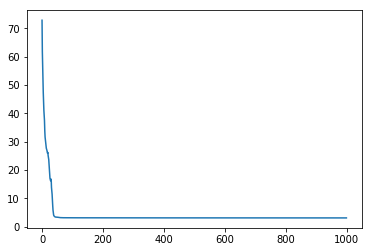

In [18]:
X = np.array(np.loadtxt('pattern1.txt'))#.astype(int)
X_train = X.reshape(156,26)

Y_train = np.array([])
for ascii_value in range(65,91):
    binary_value = str("{0:b}".format(ascii_value))
    for alpha_bin in binary_value:
        Y_train = np.append(Y_train, int(alpha_bin))
Y_train = Y_train.reshape(26, 7)
X_train_2 = add_noise_bernoulli(X_train, 35)
error, y, wo, wh1 = neural_net_fit(X_train_2, Y_train, hidden_nodes = 200)
print("Alphabet set from the trained model: ")
neural_net_predict(X_train_2, wo, wh1, Y_train)
plt.plot(error)
plt.show()

Based on above observations, we plot a graph of the results and it is clear how hidden nodes affects the accuracy.

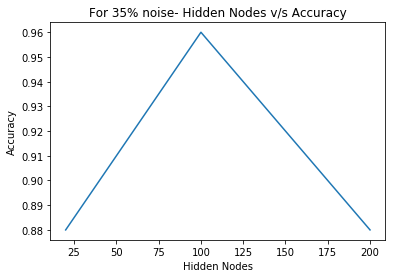

In [59]:
plt.plot([20, 100, 200],[0.88, 0.96, 0.88])
plt.xlabel('Hidden Nodes')
plt.ylabel('Accuracy')
plt.title('For 35% noise- Hidden Nodes v/s Accuracy')
plt.show()

Thus, after observing results for different number of nodes we can conclude that increasing the number of nodes to a certain extent may help in improving accuracy given noise, but once that threshold value is crossed then the accuracy starts dropping. The reason is that due to very high number of nodes we overfit the network.